In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "0"

In [3]:
os.environ["DDE_BACKEND"] = 'pytorch'
import deepxde as dde

Using backend: pytorch



In [4]:
import numpy as np

# Learning a function from a formula

In [5]:
def func(x):
    return x*np.sin(5*x)

In [6]:
geom = dde.geometry.Interval(-1, 1)
geom

In [7]:
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)
data

In [8]:
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN([1] + [20]*3 + [1], activation, initializer)
net

FNN(
  (linears): ModuleList(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [9]:
model = dde.Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])
model

Compiling model...
'compile' took 0.001244 s



In [10]:
losshistory, train_state = model.train(iterations=10000)

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.02e-01]    [2.61e-01]    [1.12e+00]    
1000      [2.00e-04]    [2.12e-04]    [3.19e-02]    
2000      [3.52e-05]    [6.37e-05]    [1.75e-02]    
3000      [1.67e-05]    [4.69e-05]    [1.50e-02]    
4000      [6.43e-06]    [3.10e-05]    [1.22e-02]    
5000      [1.21e-06]    [2.07e-05]    [9.95e-03]    
6000      [1.58e-06]    [2.00e-05]    [9.79e-03]    
7000      [2.84e-07]    [1.87e-05]    [9.45e-03]    
8000      [2.13e-07]    [1.85e-05]    [9.41e-03]    
9000      [1.92e-07]    [1.82e-05]    [9.34e-03]    
10000     [1.77e-07]    [1.81e-05]    [9.31e-03]    

Best model at step 10000:
  train loss: 1.77e-07
  test loss: 1.81e-05
  test metric: [9.31e-03]

'train' took 41.174460 s



In [11]:
losshistory

In [12]:
train_state

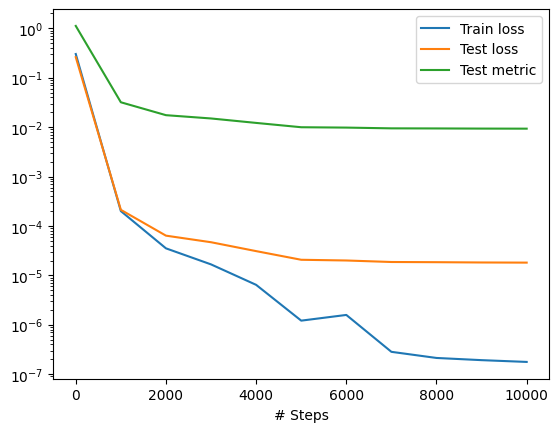

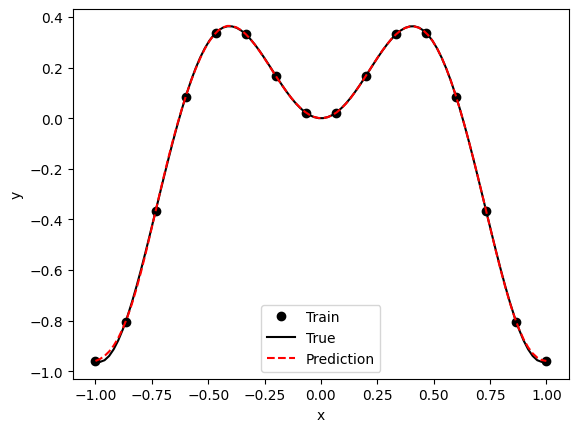

In [13]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

# Learning a function from a dataset

In [14]:
!wget -N https://raw.githubusercontent.com/lululxvi/deepxde/master/examples/dataset/dataset.train
!wget -N https://raw.githubusercontent.com/lululxvi/deepxde/master/examples/dataset/dataset.test

--2023-05-05 11:27:57--  https://raw.githubusercontent.com/lululxvi/deepxde/master/examples/dataset/dataset.train
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13022 (13K) [text/plain]
Saving to: ‘dataset.train’

dataset.train       100%[===================>]  12.72K  --.-KB/s    in 0.001s  

Last-modified header missing -- time-stamps turned off.
2023-05-05 11:27:58 (15.8 MB/s) - ‘dataset.train’ saved [13022/13022]

--2023-05-05 11:27:58--  https://raw.githubusercontent.com/lululxvi/deepxde/master/examples/dataset/dataset.test
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... failed: Connection

In [15]:
fname_train = 'dataset.train'
fname_test = 'dataset.test'

In [16]:
data = dde.data.DataSet(
    fname_train=fname_train,
    fname_test=fname_test,
    col_x=(0,),
    col_y=(1,),
    standardize=True,
)

In [17]:
layer_size = [1] + [50]*3 + [1]
activation = 'tanh'
initializer = 'Glorot normal'
net = dde.nn.FNN(layer_size, activation, initializer)

In [18]:
model = dde.Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])
losshistory, train_state = model.train(iterations=50000)

Compiling model...
'compile' took 0.000965 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [5.08e-01]    [5.28e-01]    [1.02e+00]    
1000      [7.59e-03]    [7.61e-03]    [1.22e-01]    
2000      [5.85e-03]    [6.19e-03]    [1.10e-01]    
3000      [5.33e-03]    [5.75e-03]    [1.06e-01]    
4000      [5.05e-03]    [5.53e-03]    [1.04e-01]    
5000      [4.89e-03]    [5.38e-03]    [1.03e-01]    
6000      [4.80e-03]    [5.30e-03]    [1.02e-01]    
7000      [4.77e-03]    [5.28e-03]    [1.02e-01]    
8000      [4.75e-03]    [5.29e-03]    [1.02e-01]    
9000      [4.74e-03]    [5.30e-03]    [1.02e-01]    
10000     [4.74e-03]    [5.32e-03]    [1.02e-01]    
11000     [4.74e-03]    [5.40e-03]    [1.03e-01]    
12000     [4.73e-03]    [5.40e-03]    [1.03e-01]    
13000     [4.72e-03]    [5.43e-03]    [1.03e-01]    
14000     [4.72e-03]    [5.42e-03]    [1.03e-01]    
15000     [4.70e-03]    [5.43e-03]    [1.03e-01]    
16000     [4.69e-03]    [5.43e-03]

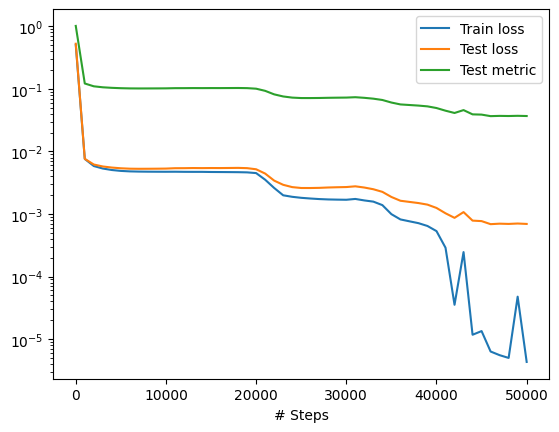

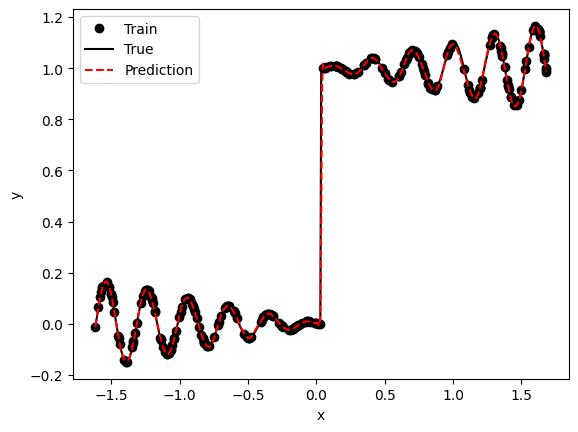

In [19]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)